In [24]:
# import the pandas module
# https://pandas.pydata.org/docs/user_guide/index.html

import pandas as pd

# numpy is a standard module for simple numerical calculations
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [25]:
data_frame0 = pd.read_csv("40.1.txt",delimiter="\t")
data_frame0 = data_frame0.drop(axis = "columns", columns = "Year")
#adjust the column names for readability
data_frame0 = data_frame0.rename(columns={'Single Race 6': 'Race', 'Year Code' : 'Year' }) #correct names so code works
data_frame0 = data_frame0[data_frame0['Year'] != 2023]

In [26]:
data_frame0=data_frame0.replace("Unreliable",np.nan)

In [27]:
data_frame0[(data_frame0["Gender"] == "Male")]

,Notes,Gender,Gender Code,Year,Deaths,Population,Crude Rate
7,NaN,Male,M,2018.0,11291.0,1.611287e+08,7.0
8,NaN,Male,M,2019.0,10499.0,1.616573e+08,6.5
9,NaN,Male,M,2020.0,9881.0,1.622562e+08,6.1
10,NaN,Male,M,2021.0,6801.0,1.643847e+08,4.1
11,NaN,Male,M,2022.0,4381.0,1.652836e+08,2.7
13,Total,Male,M,NaN,44944.0,1.145278e+09,3.9


In [28]:
data_frame = pd.read_csv("T40.1_TLW.txt",delimiter="\t")
data_frame = data_frame.drop(axis = "columns", columns = "Year")
#adjust the column names for readability
data_frame = data_frame.rename(columns={'Single Race 6': 'Race', 'Year Code' : 'Year' }) #correct names so code works
data_frame = data_frame[data_frame['Year'] != 2023]

In [29]:
data_frame=data_frame.replace("Unreliable",np.nan)

In [30]:
CF2 = data_frame0[(data_frame0["Gender"] == "Female") &
                (data_frame0["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)
CM2 = data_frame0[(data_frame0["Gender"] == "Male") &
                (data_frame0["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)
CF = data_frame0[(data_frame0["Gender"] == "Female")] [["Year", "Crude Rate"]].astype(float)
CM = data_frame0[(data_frame0["Gender"] == "Male")][["Year", "Crude Rate"]].astype(float)

In [31]:
CF2b = data_frame[(data_frame["Gender"] == "Female") & (data_frame["Race"] == "Black or African American")&
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)
CM2b = data_frame[(data_frame["Gender"] == "Male") & (data_frame["Race"] == "Black or African American")&
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)
CFb = data_frame[(data_frame["Gender"] == "Female") & (data_frame["Race"] == "Black or African American")&
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)
CMb = data_frame[(data_frame["Gender"] == "Male") & (data_frame["Race"] == "Black or African American")&
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)


CF2w = data_frame[(data_frame["Gender"] == "Female") & (data_frame["Race"] == "White")&
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)
CM2w = data_frame[(data_frame["Gender"] == "Male") & (data_frame["Race"] == "White")&
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)
CFw = data_frame[(data_frame["Gender"] == "Female") & (data_frame["Race"] == "White")&
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)
CMw = data_frame[(data_frame["Gender"] == "Male") & (data_frame["Race"] == "White")&
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)

CF2a = data_frame[(data_frame["Gender"] == "Female") & (data_frame["Race"] == "Asian")&
           (data_frame["Notes"] != "Total") ][["Year", "Crude Rate"]].astype(float)
CM2a = data_frame[(data_frame["Gender"] == "Male") & (data_frame["Race"] == "Asian")&
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)
CFa = data_frame[(data_frame["Gender"] == "Female") & (data_frame["Race"] == "Asian")&
           (data_frame["Notes"] != "Total")&(data_frame["Crude Rate"] != "NaN")][["Year", "Crude Rate"]].astype(float)
CMa = data_frame[(data_frame["Gender"] == "Male") & (data_frame["Race"] == "Asian")&
           (data_frame["Notes"] != "Total") & (data_frame["Crude Rate"] != "NaN")][["Year", "Crude Rate"]].astype(float)

CF2n = data_frame[(data_frame["Gender"] == "Female") & (data_frame["Race"] == "American Indian or Alaska Native")&
           (data_frame["Notes"] != "Total") ][["Year", "Crude Rate"]].astype(float)
CM2n = data_frame[(data_frame["Gender"] == "Male") & (data_frame["Race"] == "American Indian or Alaska Native")&
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)
CFn = data_frame[(data_frame["Gender"] == "Female") & (data_frame["Race"] == "American Indian or Alaska Native")&
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)
CMn = data_frame[(data_frame["Gender"] == "Male") & (data_frame["Race"] == "American Indian or Alaska Native")&
           (data_frame["Notes"] != "Total") & (data_frame["Crude Rate"] != "NaN")][["Year", "Crude Rate"]].astype(float)

In [32]:
print(CFa)
print(CMa)

      Year  Crude Rate
6   2018.0         0.2
7   2019.0         NaN
8   2020.0         NaN
9   2021.0         NaN
10  2022.0         NaN
      Year  Crude Rate
35  2018.0         0.6
36  2019.0         0.8
37  2020.0         0.9
38  2021.0         0.5
39  2022.0         0.3


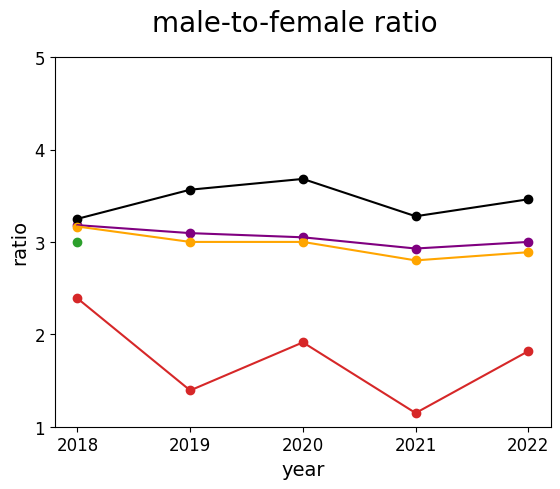

In [33]:
plt.figure()
xr=CM["Year"]
yr=CM["Crude Rate"].div(CF["Crude Rate"].values)
plt.plot(xr, yr, color="purple")
plt.scatter(xr, yr, color='purple')

xrb=CMb["Year"]
yrb=CMb["Crude Rate"].div(CFb["Crude Rate"].values)
plt.plot(xrb, yrb, color="black")
plt.scatter(xrb, yrb, color="black")

xrw=CMw["Year"]
yrw=CMw["Crude Rate"].div(CFw["Crude Rate"].values)
plt.plot(xrw, yrw, color="orange")
plt.scatter(xrw, yrw, color="orange")

xra=CMa["Year"]
yra=CMa["Crude Rate"].div(CFa["Crude Rate"].values)
plt.plot(xra, yra, color="tab:green")
plt.scatter(xra, yra, color="tab:green")

xrn=CMn["Year"]
yrn=CMn["Crude Rate"].div(CFn["Crude Rate"].values)
plt.plot(xrn, yrn, color="tab:red")
plt.scatter(xrn, yrn, color="tab:red")

plt.xticks(np.arange(2018, 2022.5, 1.0))
plt.suptitle('male-to-female ratio', fontsize=20)
#plt.legend(["Nationwide", "Black", "White", "Asian", "American Indian or Alaska Native"], frameon=False, fontsize = 14, loc = 'upper right')
plt.yticks(np.arange(1.0, 5.1, 1.0))
plt.yticks(fontsize=12, rotation=0)
plt.xticks(fontsize=12, rotation=0)
plt.xlabel("year", fontsize=14)
plt.ylabel("ratio", fontsize=14)

plt.savefig('T40.1_RatioRacesb2_R.png')